In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

!gdown 1qT7rce3rSXTzAa7JwJN52pHPsZuGqheRrpyZYBlFsSk

Downloading...
From (original): https://drive.google.com/uc?id=1qT7rce3rSXTzAa7JwJN52pHPsZuGqheRrpyZYBlFsSk
From (redirected): https://docs.google.com/spreadsheets/d/1qT7rce3rSXTzAa7JwJN52pHPsZuGqheRrpyZYBlFsSk/export?format=xlsx
To: /content/scaler_clustering.xlsx
13.9MB [00:00, 42.2MB/s]


In [ ]:
# Reading the input file
df = pd.read_excel('/content/scaler_clustering.xlsx')

In [ ]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019


In [ ]:
df.shape

(205843, 7)

In [ ]:
df['email_hash'].nunique()


153443

In [ ]:
df.dtypes


,0
Unnamed: 0,int64
company_hash,object
email_hash,object
orgyear,float64
ctc,int64
job_position,object
ctc_updated_year,int64


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


Missing Values:

1. There are 44 rows where company_hash is null implying the corresponding students are still not mapped to the company yet and are unemployed

2. For almost 1/3rd of the data, the job_position is null

3. for 86 rows, employment year is null

4. Since there are multiple rows for a single id, we need to check for duplicates and check if it can be aggregated at email_hash level and for the null rows,we need to check if the value is present in some other row for the same email hash

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_imputed = df.copy()

In [ ]:
df_imputed.isnull().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0





# **NULL VALUES TREATMENT**

## **Separating rows of the dataframe with multiple occurences of email hash and single occurence to treat null value**


In [ ]:
df1 = df.drop_duplicates()

In [ ]:

# Count the occurrences of each student_id
df1['count'] = df1.groupby('email_hash')['email_hash'].transform('count')

# Create the flag based on count of email hash of number of rows for that email hash
df1['instance_flag'] = df1['count'].apply(lambda x: 'multiple_instance' if x > 1 else 'single_instance')

# Drop the 'count' column if not needed
df1.drop(columns='count', inplace=True)


<ipython-input-16-0105e6ecfbd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['count'] = df1.groupby('email_hash')['email_hash'].transform('count')
<ipython-input-16-0105e6ecfbd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['instance_flag'] = df1['count'].apply(lambda x: 'multiple_instance' if x > 1 else 'single_instance')
<ipython-input-16-0105e6ecfbd4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [ ]:
df1['instance_flag'].value_counts()

,count
instance_flag,
single_instance,112252
multiple_instance,93557


In [ ]:
### mapping the rows with unemployed where the company information is null

df1['unemployed'] = np.where((df1['instance_flag'] == 'single_instance') & (df1['company_hash'].isnull()), 'Yes', 'No')


<ipython-input-18-2c8da9b4dbf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['unemployed'] = np.where((df1['instance_flag'] == 'single_instance') & (df1['company_hash'].isnull()), 'Yes', 'No')


In [ ]:
df1['unemployed'].value_counts()

,count
unemployed,
No,205782
Yes,27


In [ ]:
### wherever the job_position is null and there is single occurance of the email_id, placing unknown for all such rows in job position

df1['job_position'] = np.where((df1['instance_flag'] == 'single_instance') & (df1['job_position'].isnull()), 'Unknown', df1['job_position'])


<ipython-input-20-64f827de0b27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['job_position'] = np.where((df1['instance_flag'] == 'single_instance') & (df1['job_position'].isnull()), 'Unknown', df1['job_position'])


In [ ]:
df1['job_position'].value_counts()

,count
job_position,
Backend Engineer,43546
FullStack Engineer,24711
Unknown,19295
Other,18072
Frontend Engineer,10417
...,...
TX SME,1
Mechanical engineers,1
No job,1


In [ ]:
df1.isnull().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,33253
ctc_updated_year,0
instance_flag,0
unemployed,0


In [ ]:
### checking the values of job position for instances where its null in the multiple email hash rows

check = df1[(df1['instance_flag'] == 'multiple_instance')]


In [ ]:
check.shape

(93557, 8)

In [ ]:
result = check.groupby('email_hash').agg(
    present_count=('job_position', lambda x: x.notnull().sum()),  # Count non-null values
    null_count=('job_position', lambda x: x.isnull().sum())      # Count null values
    )

# Display the result
print(result)

                                                    present_count  null_count
email_hash                                                                   
0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032a...              1           1
0001b94dbb1e85477b07fb6558ead3456c3735893c81f4a...              2           0
00022dc29c7f77032275182b883d4f273ea1007aefc437f...              2           0
00036c2c5212d88d07acdc5bda7eef5653f8b09bbe30b73...              1           1
00037a2e4fcfe2830d91270102aaaf105a324a3ce17075a...              1           1
...                                                           ...         ...
fff0c03a084084e8252a633f557e8e022af20dba0457fe1...              1           1
fff8f70c1d8956c7f976fb0821d114b62f4d965f36bbe49...              1           1
fff9d3463b21cf1b552a5deb4d7d8af2c5ce7ebcb1f37e5...              1           1
fffbe8ae9661e28d1b63241c144010d34f60ad7d557b2fc...              1           1
fffbf480e0003fe636e4d73543eaa472305e1a720c1fd31...              

In [ ]:
### checking rows where the company and job position both are null in order to treat them for nulls

check1 = check[check['company_hash'].isnull()]

In [ ]:
check1.shape

(17, 8)

In [ ]:
check1.sort_values(by=['email_hash','orgyear','ctc'],ascending=True).head(17)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,instance_flag,unemployed
18853,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,FullStack Engineer,2021,multiple_instance,No
19466,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,NaN,2021,multiple_instance,No
4596,NaN,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...,2020.0,300000,NaN,2021,multiple_instance,No
93712,NaN,50f183667fd8a115dda5aa345988b314e1d98a3d937ea0...,2019.0,500000,Database Administrator,2019,multiple_instance,No
108479,NaN,50f183667fd8a115dda5aa345988b314e1d98a3d937ea0...,2019.0,500000,NaN,2019,multiple_instance,No
4205,NaN,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214...,2018.0,600000,NaN,2020,multiple_instance,No
1115,NaN,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...,2022.0,66600000,NaN,2020,multiple_instance,No
68706,NaN,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...,2022.0,66600000,Database Administrator,2020,multiple_instance,No
176727,NaN,a75da322109f201148da6b4a1ab785518e6229c1379a09...,2017.0,1200000,NaN,2018,multiple_instance,No
45630,NaN,b17c74b195c1fa8038bf82c674716ae81b41b995a3b434...,2020.0,600000,NaN,2020,multiple_instance,No


In [ ]:
### filling in the null values of job position for rows where there are multiple instances of the email hash by taking the value of

# Apply the operation only where 'flag' is 'multiple_flag'
condition = df1['instance_flag'] == "multiple_instance"
df1.loc[condition, 'job_position'] = df1[condition].groupby('email_hash')['job_position'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)


<ipython-input-29-f6bee101ee57>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')
<ipython-input-29-f6bee101ee57>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(method='ffill').fillna(method='bfill')


In [ ]:
### filling in the null values of job company hash for rows where there are multiple instances of the email hash by taking the value of backfill
condition = df1['instance_flag'] == "multiple_instance"
df1.loc[condition, 'company_hash'] = df1[condition].groupby('email_hash')['company_hash'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)


<ipython-input-30-d26012fec229>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')
<ipython-input-30-d26012fec229>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(method='ffill').fillna(method='bfill')


In [ ]:
df1.isnull().sum()

,0
company_hash,37
email_hash,0
orgyear,86
ctc,0
job_position,1860
ctc_updated_year,0
instance_flag,0
unemployed,0


In [ ]:


df1['unemployed'] = np.where((df1['instance_flag'] == 'multiple_instance') & (df1['company_hash'].isnull()), 'Yes', df1['unemployed'])


<ipython-input-32-b27ba374016e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['unemployed'] = np.where((df1['instance_flag'] == 'multiple_instance') & (df1['company_hash'].isnull()), 'Yes', df1['unemployed'])


In [ ]:
check2 = df1[(df1['orgyear'].isnull())]

In [ ]:
check2.sort_values(by=['email_hash'],ascending=True)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,instance_flag,unemployed
17189,xzzgcvnxct qtnvxr wgzwtun ucn rna,01a284abb1ed97d72506b7a3f641b9b545e1878dfe9e50...,NaN,100000000,Other,2020,single_instance,No
60914,exzvzwxvr wgzahwn vhnygqxnj,040a1f04539f587f7c656912fe42d03617f2f65b33c2aa...,NaN,145000,Engineering Leadership,2017,single_instance,No
38423,xuvj ojontbo rna,060f40a7586f40c79211d1d6ba97b928d16991dfb9f4cb...,NaN,709000,Android Engineer,2018,single_instance,No
5450,sgrabvz ovwyo,0e25bf875aaa6550db1aa9f9452179ed1cd6737c079fbc...,NaN,4000000,Backend Engineer,2021,multiple_instance,No
47334,wgszxkvzn,0f4c60c23f3161fa21002935631eeb51f3d94aaa75fee7...,NaN,1010000,Other,2020,single_instance,No
...,...,...,...,...,...,...,...,...
92258,uqtowxtzn ntwyzgrgsxto,f0e7f60ee9d43d575b80afd9b24057c303d2a2a2e0877d...,NaN,1280000,Unknown,2020,single_instance,No
89161,bxav xatvro,f7b814c6c4b821b6293ae3f9789c8839f3b0f8666b1d02...,NaN,1300000,Data Scientist,2019,single_instance,No
4010,nxamxn ogrhnxgzo,f9c1d0e623046d445a705bc39007f05619bcd37c75d3e8...,NaN,900000,Unknown,2020,single_instance,No
160824,evqbtqrxzt rna,fadfe9dd062538ab3c2069a0d60aae2752ed0f513c79af...,NaN,10000000,Android Engineer,2019,single_instance,No


In [ ]:
check2.shape

(86, 8)

In [ ]:
check2['email_hash'].nunique()

84

In [ ]:
df['ctc_updated_year'] = df['ctc_updated_year'].astype(int)


In [ ]:
df1['orgyear'] = np.where(df1['orgyear'].isnull(), df1['ctc_updated_year'] - 1, df1['orgyear'])


<ipython-input-38-cd6b1527a88c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['orgyear'] = np.where(df1['orgyear'].isnull(), df1['ctc_updated_year'] - 1, df1['orgyear'])


In [ ]:
df1['orgyear'].value_counts()

,count
orgyear,
2018.0,25275
2019.0,23459
2017.0,23244
2016.0,23043
2015.0,20609
...,...
2107.0,1
1972.0,1
2101.0,1


In [ ]:
from datetime import datetime
current_year = datetime.now().year
df1['orgyear'] = df1['orgyear'].astype(int)
df_filtered = df1[df1['orgyear'] <= current_year]


<ipython-input-40-b6c944658157>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['orgyear'] = df1['orgyear'].astype(int)


In [ ]:
## filtering out rows where the orgyear is < 1950

df_filtered = df_filtered[df_filtered['orgyear'] >= 1950]

In [ ]:
df_filtered.shape

(205722, 8)

In [ ]:
df_filtered['job_position'] = np.where((df_filtered['job_position'].isnull() & df_filtered['company_hash'].notnull()), "Unknown", df_filtered['job_position'])


In [ ]:
df_filtered.shape

(205722, 8)

# USE OF KNN IMPUTATION FOR MISSING VALUES IN COMPANY COLUMN

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Initialize dictionary to store encoders
label_encoders = {}

# Step 1: Encode the categorical column using LabelEncoder
le = LabelEncoder()

# Temporarily fill NaN with a placeholder ('nan') before encoding
df_filtered['company_hash'] = df_filtered['company_hash'].fillna('nan').astype(str)

# Apply LabelEncoder to the column
df_filtered['company_hash'] = le.fit_transform(df_filtered['company_hash'])

# Save the encoder for decoding later
label_encoders['company_hash'] = le

# Step 2: Identify columns with missing values (NaNs for imputation)
columns_with_nan = ['company_hash']

# Step 3: Apply KNN imputation only to the encoded column
imputer = KNNImputer(n_neighbors=2)

# Ensure it's a 2D array and fit-transform the relevant column
df_filtered[columns_with_nan] = imputer.fit_transform(df_filtered[columns_with_nan])

# Step 4: Decode the categorical column back to original labels
le = label_encoders['company_hash']

# Round the imputed values to the nearest integer before decoding
df_filtered['company_hash'] = le.inverse_transform(df_filtered['company_hash'].round().astype(int))




In [ ]:
# df_filtered['company_hash'] = np.where((df_filtered['company_hash'].isnull()), "no company yet", df_filtered['company_hash'])

In [ ]:
df_filtered.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,instance_flag,unemployed
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,multiple_instance,No
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,multiple_instance,No
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,multiple_instance,No
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,single_instance,No
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,multiple_instance,No


In [ ]:
### all the null rows are treated now

df_filtered.isnull().sum()

,0
company_hash,0
email_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0
instance_flag,0
unemployed,0


**FEATURE ENGINEERING**

In [ ]:
df_filtered['years_of_experience'] = df_filtered['orgyear'].apply(lambda x: current_year - x)

In [ ]:
max(df_filtered['years_of_experience'])

54

In [ ]:
df_filtered['years_since_ctc_upgrade'] = df_filtered['ctc_updated_year'].apply(lambda x: current_year - x)

In [ ]:
max(df_filtered['years_since_ctc_upgrade'])

9

In [ ]:
df = df_filtered.sort_values(by=['email_hash', 'ctc'],ascending=True)


In [ ]:
# Initialize the 'CTC_change' column with default values
df['CTC_change'] = 0

df = df.reset_index(drop=True)


# Compute the CTC change for rows with 'multiple_instance'
df['CTC_change'] = df.apply(
    lambda row: row['ctc'] - df.loc[row.name - 1, 'ctc']
    if row.name > 0
    and row['instance_flag'] == 'multiple_instance'
    and df.loc[row.name - 1, 'email_hash'] == row['email_hash']
    else 0,
    axis=1
)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,instance_flag,unemployed,years_of_experience,years_since_ctc_upgrade,CTC_change
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012,3500000,Backend Engineer,2019,single_instance,No,12,5,0
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013,250000,Backend Engineer,2020,single_instance,No,11,4,0
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,multiple_instance,No,3,5,0
3,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,multiple_instance,No,3,5,0
4,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004,2000000,FullStack Engineer,2021,single_instance,No,20,3,0


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,instance_flag,unemployed,years_of_experience,years_since_ctc_upgrade,CTC_change
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012,3500000,Backend Engineer,2019,single_instance,No,12,5,0
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013,250000,Backend Engineer,2020,single_instance,No,11,4,0
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,multiple_instance,No,3,5,0
3,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,multiple_instance,No,3,5,0
4,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004,2000000,FullStack Engineer,2021,single_instance,No,20,3,0


In [ ]:
df.dtypes

,0
company_hash,object
email_hash,object
orgyear,int64
ctc,int64
job_position,object
ctc_updated_year,int64
instance_flag,object
unemployed,object
years_of_experience,int64
years_since_ctc_upgrade,int64


# REMOVE ALL SPECIAL CHARACTERS FROM THE DATAFRAME

In [ ]:
import re

def remove_special_characters(text):
    if isinstance(text, str):  # Only process strings
        return re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text  # Return as is if not a string

# Apply the function to the DataFrame
df_cleaned = df.applymap(remove_special_characters)

<ipython-input-58-6d76afe5464a>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(remove_special_characters)


In [ ]:
df_cleaned.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,instance_flag,unemployed,years_of_experience,years_since_ctc_upgrade,CTC_change
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012,3500000,Backend Engineer,2019,singleinstance,No,12,5,0
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013,250000,Backend Engineer,2020,singleinstance,No,11,4,0
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,multipleinstance,No,3,5,0
3,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,multipleinstance,No,3,5,0
4,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004,2000000,FullStack Engineer,2021,singleinstance,No,20,3,0


In [ ]:
df_cleaned['instance_flag'].value_counts()

,count
instance_flag,
singleinstance,112188
multipleinstance,93534


In [ ]:
## ENCODING THE TWO COLUMNS - UNEMPLOYED AND INSTANCE FLAG

df_cleaned['unemployed'] = df_cleaned['unemployed'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df_cleaned['instance_flag'] = df_cleaned['instance_flag'].apply(lambda x: 1 if x == 'multipleinstance' else 0)

In [ ]:
df_cleaned['instance_flag'].value_counts()

,count
instance_flag,
0,112188
1,93534


In [ ]:
df_cleaned['job_position'] = df_cleaned['job_position'].apply(lambda x: str(x))

In [ ]:
# ENCODING THE JOB_POSITION COLUMN WITH FREQUENCY ENCODING FOR CLUSTERING

df_cleaned['job_position_freq'] = df_cleaned['job_position'].map(df_cleaned['job_position'].value_counts())


In [ ]:
df_cleaned.columns.tolist()

['company_hash',
 'email_hash',
 'orgyear',
 'ctc',
 'job_position',
 'ctc_updated_year',
 'instance_flag',
 'unemployed',
 'years_of_experience',
 'years_since_ctc_upgrade',
 'CTC_change',
 'job_position_freq']

### Checking Clustering Tendancy - HOPKINS STATISTICS

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random

def hopkins_statistic(X, sample_size=None):
    """
    Calculates the Hopkins statistic to evaluate clustering tendency.
    """
    if sample_size is None:
        sample_size = int(0.1 * len(X))  # Use 10% of data for testing

    random.seed(42)
    X = np.array(X)

    # Random sample of real points
    random_indices = random.sample(range(len(X)), sample_size)
    real_points = X[random_indices]

    # Generate random points in the same feature space
    mins, maxs = X.min(axis=0), X.max(axis=0)
    random_points = np.random.uniform(mins, maxs, (sample_size, X.shape[1]))

    # Nearest neighbors for both real and random points
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(X)

    u_distances = nn.kneighbors(random_points, return_distance=True)[0].sum()  # Distances to nearest random points
    w_distances = nn.kneighbors(real_points, return_distance=True)[0].sum()  # Distances to nearest real points

    H = u_distances / (u_distances + w_distances)  # Hopkins statistic
    return H


# Calculate Hopkins statistic
H = hopkins_statistic(df_cleaned.select_dtypes(exclude='object').values)
print("Hopkins Statistic:", H)


Hopkins Statistic: 1.0


# **Conclusion - clustering tendancies** - hopkins statistic indicates strong clustering tendancies

APPLYING PCA ON THE DATAFRAME ON JOB POSITION COLUMN JUST TO CHECK THE VARIANCE(OPTIONAL- TO BE REMOVED)





In [ ]:
import pandas as pd

from sklearn.decomposition import PCA

# One-hot encode the job_position column
job_position_dummies = pd.get_dummies(df_cleaned['job_position'])

# Apply PCA to reduce dimensions
pca = PCA(n_components=9)  # Reduce to 50 components
reduced_features = pca.fit_transform(job_position_dummies)

# # Add reduced features back to the DataFrame
#

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


print(cumulative_variance)

[0.24745226 0.4025386  0.52339881 0.61017485 0.66930043 0.71149617
 0.74938982 0.78255295 0.81346411]


In [ ]:
df_pca = pd.DataFrame(reduced_features, columns=[f'PCA_{i}' for i in range(9)])
df = pd.concat([df_cleaned, df_pca], axis=1)


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,instance_flag,unemployed,years_of_experience,years_since_ctc_upgrade,...,job_position_freq,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012,3500000,Backend Engineer,2019,0,0,12,5,...,52937,0.769834,0.107486,0.015391,-0.057242,0.030340,0.001831,0.007953,0.000038,-0.003658
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013,250000,Backend Engineer,2020,0,0,11,4,...,52937,0.769834,0.107486,0.015391,-0.057242,0.030340,0.001831,0.007953,0.000038,-0.003658
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,1,0,3,5,...,31583,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661
3,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021,1300000,FullStack Engineer,2019,1,0,3,5,...,31583,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661
4,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004,2000000,FullStack Engineer,2021,0,0,20,3,...,31583,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661


In [ ]:
#### saving the dataframe for manual clustering

df_manual = df.copy()

LABEL ENCODING THE COMPANY AND EMAIL COLUMN

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode company_hash
df_manual['company_hash_encoded'] = label_encoder.fit_transform(df_manual['company_hash'])

# Encode email_hash
df_manual['email_hash_encoded'] = label_encoder.fit_transform(df_manual['email_hash'])

# Drop the original columns if not needed
df_manual = df_manual.drop(['company_hash', 'email_hash'], axis=1)

print(df_manual.head())

   orgyear      ctc        job_position  ctc_updated_year  instance_flag  \
0     2012  3500000    Backend Engineer              2019              0   
1     2013   250000    Backend Engineer              2020              0   
2     2021  1300000  FullStack Engineer              2019              1   
3     2021  1300000  FullStack Engineer              2019              1   
4     2004  2000000  FullStack Engineer              2021              0   

   unemployed  years_of_experience  years_since_ctc_upgrade  CTC_change  \
0           0                   12                        5           0   
1           0                   11                        4           0   
2           0                    3                        5           0   
3           0                    3                        5           0   
4           0                   20                        3           0   

   job_position_freq  ...     PCA_1     PCA_2     PCA_3     PCA_4     PCA_5  \
0            

In [ ]:
df.drop(['ctc_updated_year','orgyear'], axis=1, inplace=True)

In [ ]:
df.head()

,company_hash,email_hash,ctc,job_position,instance_flag,unemployed,years_of_experience,years_since_ctc_upgrade,CTC_change,job_position_freq,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,3500000,Backend Engineer,0,0,12,5,0,52937,0.769834,0.107486,0.015391,-0.057242,0.030340,0.001831,0.007953,0.000038,-0.003658
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,250000,Backend Engineer,0,0,11,4,0,52937,0.769834,0.107486,0.015391,-0.057242,0.030340,0.001831,0.007953,0.000038,-0.003658
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000,FullStack Engineer,1,0,3,5,0,31583,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661
3,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000,FullStack Engineer,1,0,3,5,0,31583,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661
4,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2000000,FullStack Engineer,0,0,20,3,0,31583,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661


In [ ]:
df.columns.tolist()

['company_hash',
 'email_hash',
 'ctc',
 'job_position',
 'instance_flag',
 'unemployed',
 'years_of_experience',
 'years_since_ctc_upgrade',
 'CTC_change',
 'job_position_freq',
 'PCA_0',
 'PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8']

In [ ]:
df['job_position'].value_counts(normalize=True)*100

,proportion
job_position,
Backend Engineer,25.732299
FullStack Engineer,15.352272
Other,10.934173
Unknown,10.272115
Frontend Engineer,6.176296
...,...
Backend Engineering,0.000486
Software Consultant,0.000486
Engineer I,0.000486


In [ ]:
freq_encoding = df['job_position'].value_counts(normalize=True)
df['job_position_freq'] = df['job_position'].map(freq_encoding)

In [ ]:
df.head()

,company_hash,email_hash,ctc,job_position,instance_flag,unemployed,years_of_experience,years_since_ctc_upgrade,CTC_change,job_position_freq,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,3500000,Backend Engineer,0,0,12,5,0,0.257323,0.769834,0.107486,0.015391,-0.057242,0.030340,0.001831,0.007953,0.000038,-0.003658
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,250000,Backend Engineer,0,0,11,4,0,0.257323,0.769834,0.107486,0.015391,-0.057242,0.030340,0.001831,0.007953,0.000038,-0.003658
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000,FullStack Engineer,1,0,3,5,0,0.153523,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661
3,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,1300000,FullStack Engineer,1,0,3,5,0,0.153523,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661
4,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2000000,FullStack Engineer,0,0,20,3,0,0.153523,-0.490681,0.742347,0.048969,-0.133953,0.061309,0.003462,0.014816,0.000069,-0.006661


# **AGGREGATING THE DATAFRAME BY EMAIL AND COMPANY**

In [ ]:
# Example: Aggregate by company_id
company_aggregates = df.groupby(['email_hash','company_hash']).agg({
    'ctc': 'mean',
    'years_of_experience': 'mean','years_since_ctc_upgrade': 'mean','CTC_change': 'mean','instance_flag': 'first','unemployed': 'first',
    'job_position_freq': 'first'
}).reset_index()


In [ ]:
company_aggregates.shape

(160231, 9)

In [ ]:

# Drop original ID columns if no longer relevant
df_new = company_aggregates.drop(columns=['email_hash', 'company_hash'])


In [ ]:
### FINAL DATAFRAME BEFORE CLUSTERING

df_new.columns.tolist()

['ctc',
 'years_of_experience',
 'years_since_ctc_upgrade',
 'CTC_change',
 'instance_flag',
 'unemployed',
 'job_position_freq']

# EDA

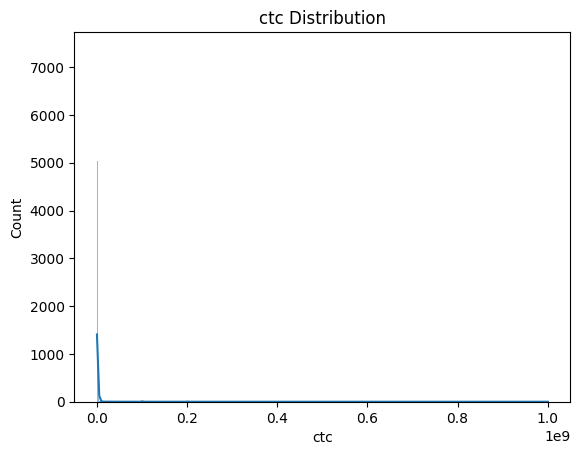

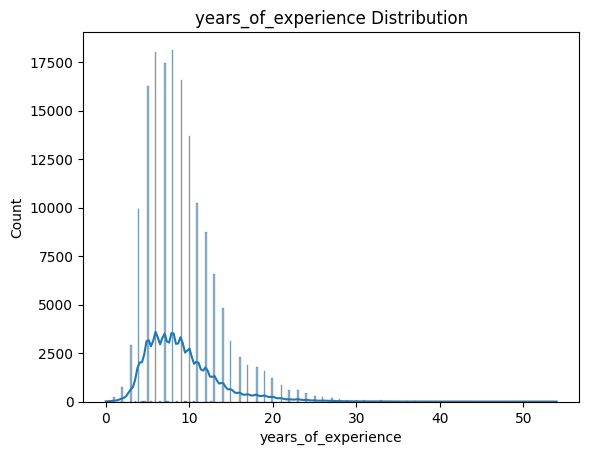

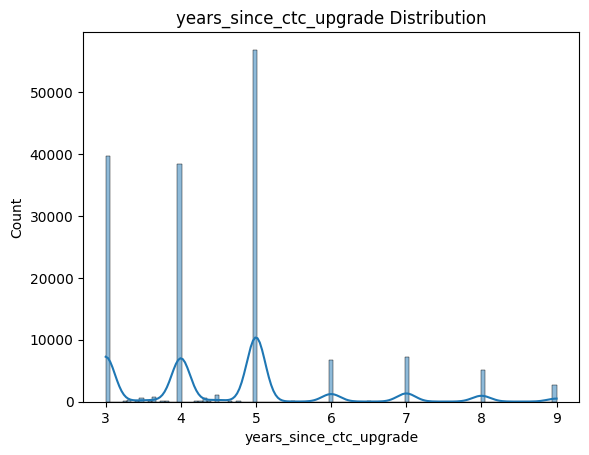

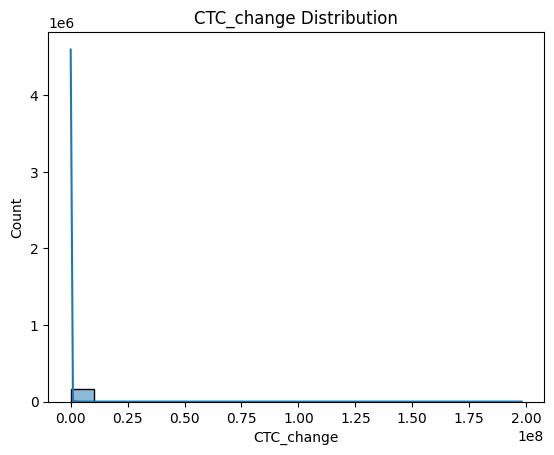

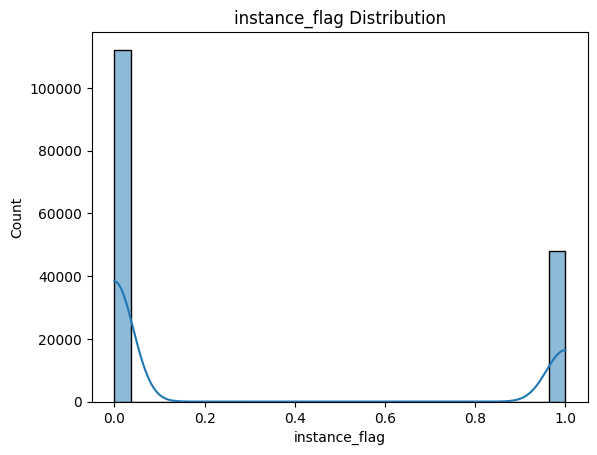

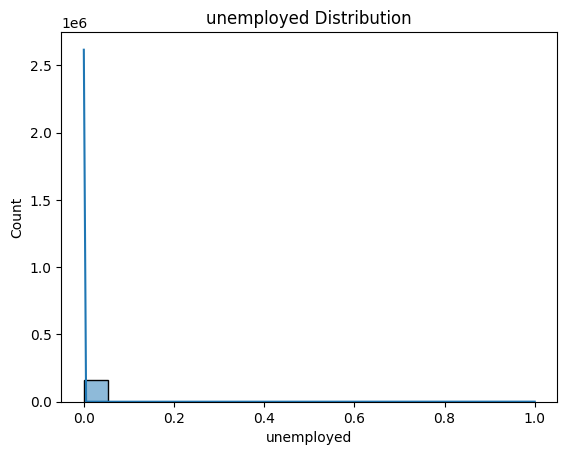

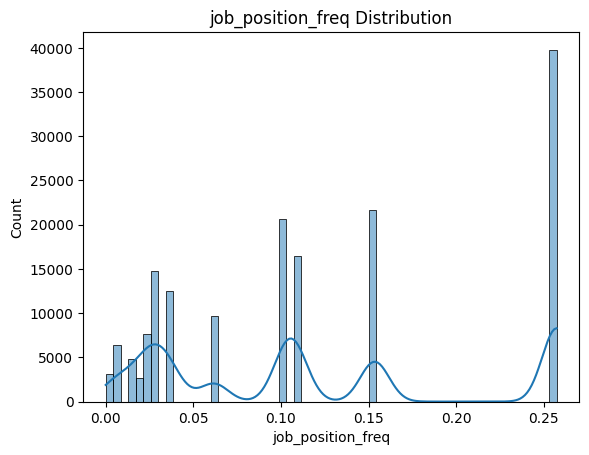

In [ ]:
for col in df_new.select_dtypes(exclude='object').columns:
    sns.histplot(df_new[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

In [ ]:
# Calculate the normalized value counts
normalized_counts = df_manual['job_position'].value_counts(normalize=True)

# Take the top 10 job positions
top_10_positions = normalized_counts.head(10)

# Display the result
print(top_10_positions)

job_position
Backend Engineer          0.257323
FullStack Engineer        0.153523
Other                     0.109342
Unknown                   0.102721
Frontend Engineer         0.061763
QA Engineer               0.037531
Engineering Leadership    0.036379
Android Engineer          0.029083
Data Scientist            0.029059
SDET                      0.025831
Name: proportion, dtype: float64


**CONCLUSION FROM DISTRIBUTION OF HISTOGRAM :**
1. years of experience is right skewed with some of the students having very high number of years of experience, the peak is at around 6 to 7 years
2. CTC :  a majority of individuals earn relatively modest compensation compared to the higher end of the scale.
Presence of Outliers:
There are visible outliers in the higher CTC range (e.g., individuals with very high salaries), but these occur infrequently.
need to determine if they are valid or indicative of a specific subset of the population (e.g., leadership roles, highly specialized roles).
3. instance - many students have worked in multiple companies(~40%) but most of the students seem to have lesser experience with just one company
4. ctc change : A few extreme outliers are visible far from the main cluster, suggesting that most employees have experienced little or no change in their compensation.


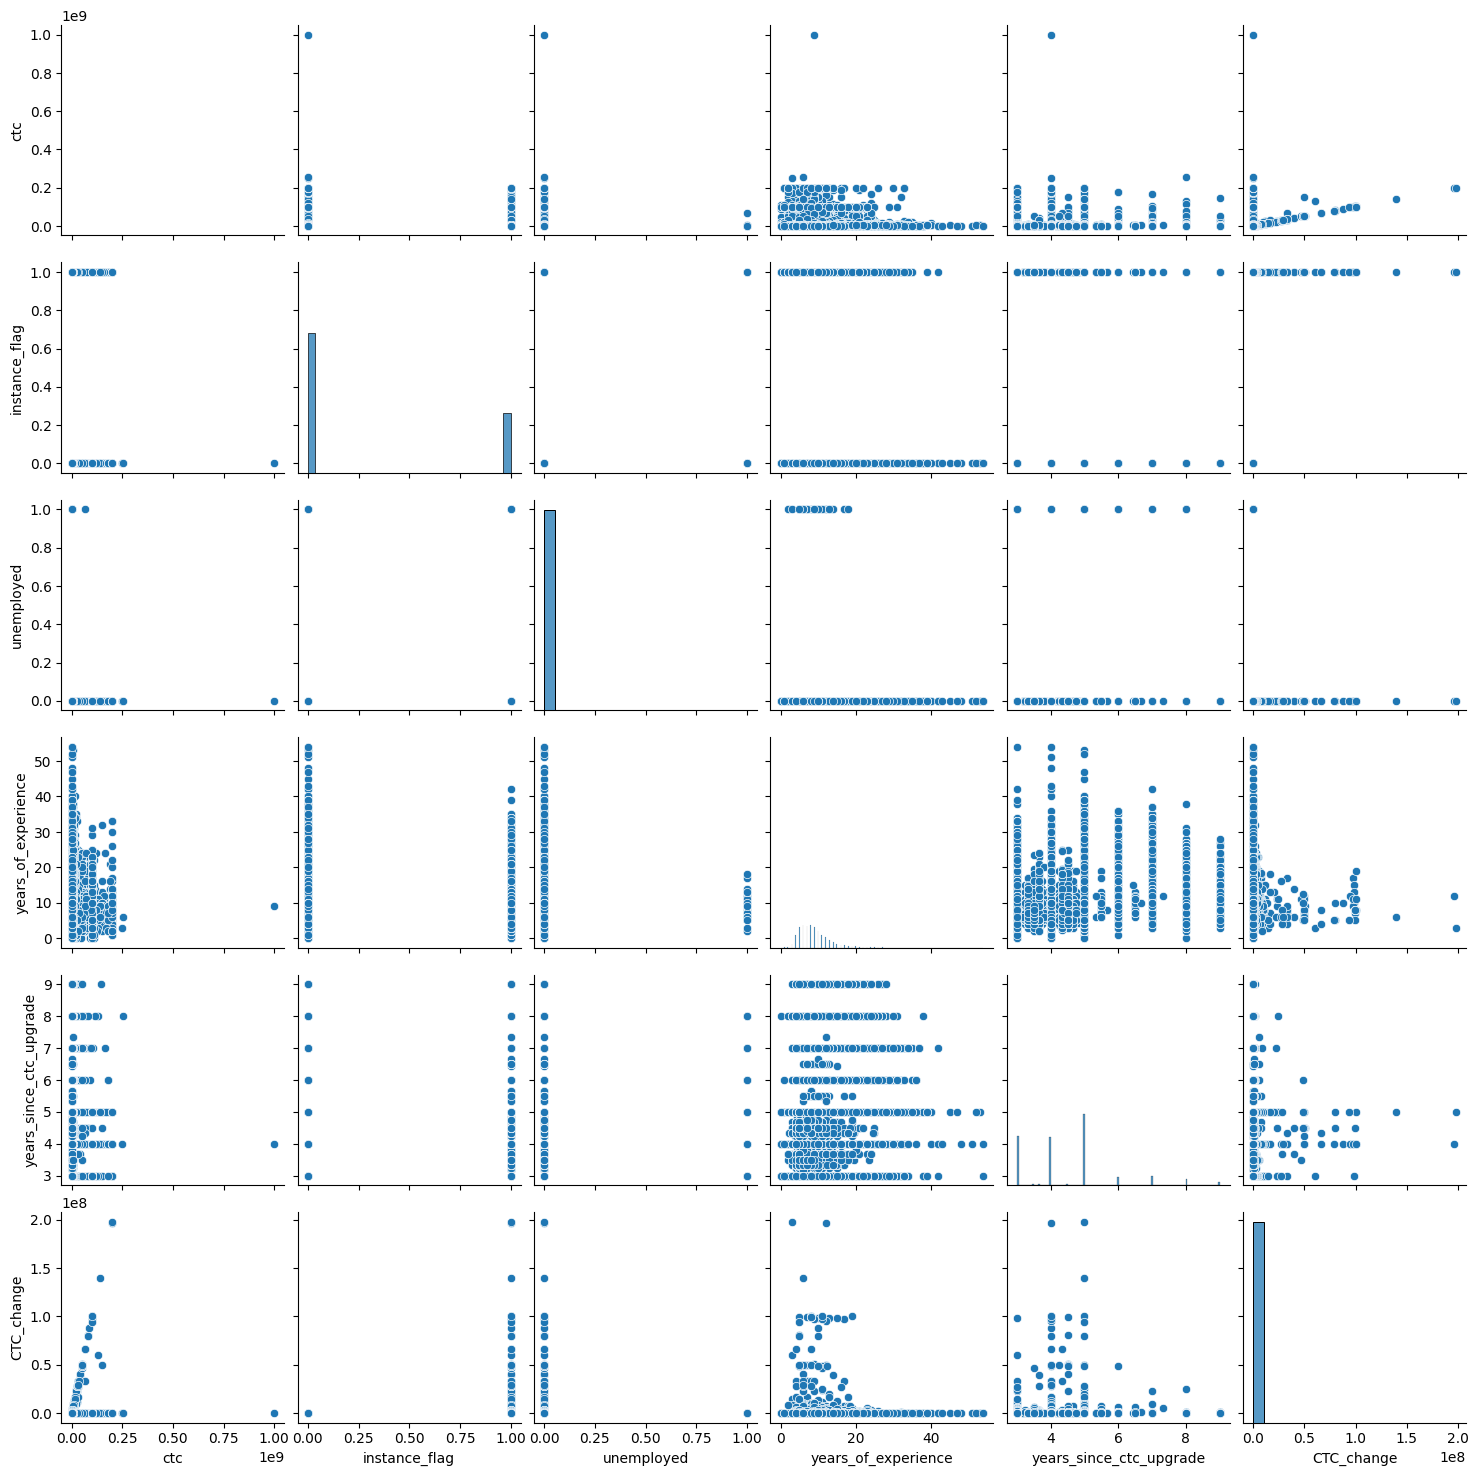

In [ ]:
# Step 1: Select columns for pairplot
columns_to_plot = [
 'ctc',
 'instance_flag',
 'unemployed',
 'years_of_experience',
 'years_since_ctc_upgrade',
 'CTC_change']

# Step 2: Create pairplot
sns.pairplot(
    df_new[columns_to_plot])

# Step 3: Show the plot
plt.show()

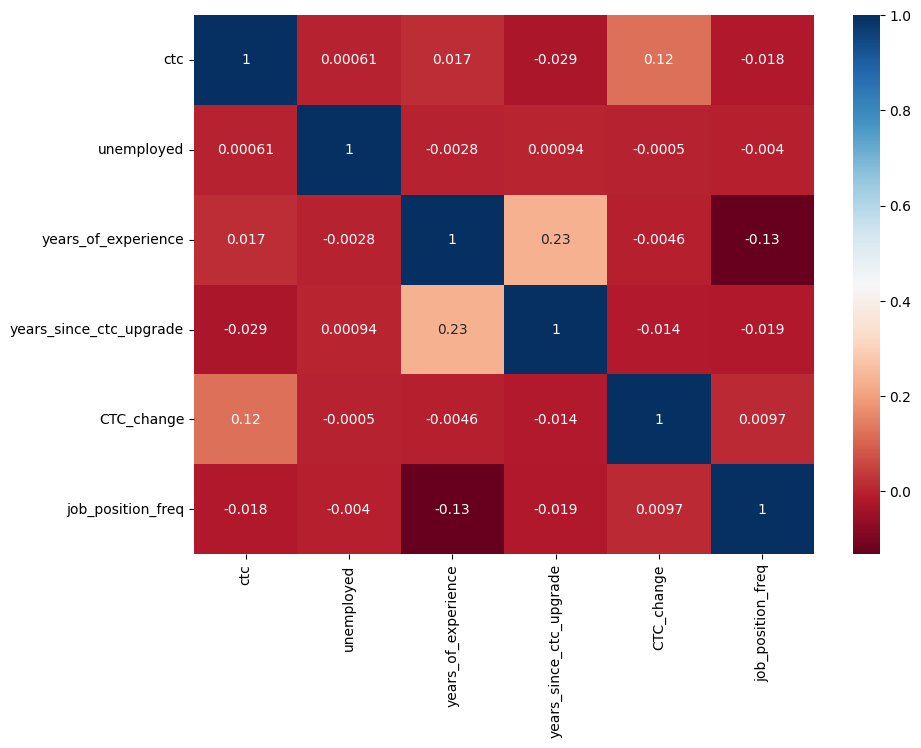

In [ ]:

col = [ 'ctc',
 'unemployed',
 'years_of_experience',
 'years_since_ctc_upgrade',
 'CTC_change','job_position_freq']
plt.figure(figsize=(10, 7))
sns.heatmap(df_new[col].corr(), annot=True,cmap='RdBu')
plt.show()

In [ ]:
df_new.describe(percentiles=[0.10,0.8,0.9,0.95,0.98,0.99])

,ctc,years_of_experience,years_since_ctc_upgrade,CTC_change,instance_flag,unemployed,job_position_freq
count,1.602310e+05,160231.000000,160231.000000,1.602310e+05,160231.000000,160231.000000,160231.000000
mean,2.471142e+06,9.107794,4.535580,5.455937e+04,0.299836,0.000200,0.120479
std,1.283506e+07,4.329133,1.347053,1.539613e+06,0.458187,0.014131,0.090252
min,2.000000e+00,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000005
10%,3.400000e+05,5.000000,3.000000,0.000000e+00,0.000000,0.000000,0.017699
50%,9.700000e+05,8.000000,4.333333,0.000000e+00,0.000000,0.000000,0.102721
80%,2.000000e+06,12.000000,5.000000,0.000000e+00,1.000000,0.000000,0.257323
90%,2.900000e+06,14.000000,6.000000,0.000000e+00,1.000000,0.000000,0.257323
95%,4.000000e+06,18.000000,7.000000,4.750000e+04,1.000000,0.000000,0.257323
98%,6.800000e+06,21.000000,8.000000,3.750000e+05,1.000000,0.000000,0.257323


In [ ]:
df1 = df_new

In [ ]:
df1.columns.tolist()

['ctc',
 'years_of_experience',
 'years_since_ctc_upgrade',
 'CTC_change',
 'instance_flag',
 'unemployed',
 'job_position_freq']

In [ ]:
df1['unemployed'] = np.where(df1['unemployed'] == 'Yes', 1, 0)


In [ ]:
df1['instance_flag'] = np.where(df1['instance_flag'] == 'multipleinstance', 1, 0)

In [ ]:
### sampling a part of the entire dataframe for hierarchical clustering

import pandas as pd

# Assuming `df` is your dataset
sampled_data_hc = df1.sample(n=10000, random_state=42)  # Set random_state for reproducibility



In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# Step 1: Initialize MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0, 1))

# Step 2: Fit and Transform the Data
scaled_data_sample = scaler.fit_transform(sampled_data_hc)

# Step 3: Convert back to a DataFrame
scaled_df_sample = pd.DataFrame(scaled_data_sample, columns=sampled_data_hc.columns)



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize (Z-score normalization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

scaled_df = pd.DataFrame(scaled_data, columns=df1.columns)



In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Step 1: Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Default range is [0, 1]

# Step 2: Fit and Transform the Data
scaled_data1 = scaler.fit_transform(df1)

# Step 3: Convert back to a DataFrame
scaled_df1 = pd.DataFrame(scaled_data1, columns=df1.columns)

# Display the Scaled DataFrame
print("Original Data:")
print(df1)
print("\nScaled Data:")
print(scaled_df1)


Original Data:
              ctc  years_of_experience  years_since_ctc_upgrade  CTC_change  \
0       3500000.0                 12.0                      5.0         0.0   
1        250000.0                 11.0                      4.0         0.0   
2       1300000.0                  3.0                      5.0         0.0   
3       2000000.0                 20.0                      3.0         0.0   
4       3400000.0                 15.0                      6.0         0.0   
...           ...                  ...                      ...         ...   
160226  3529999.0                 20.0                      5.0         0.0   
160227  1600000.0                  9.0                      6.0         0.0   
160228   900000.0                 10.0                      5.0         0.0   
160229   700000.0                  4.0                      4.0         0.0   
160230  1500000.0                  6.0                      3.0         0.0   

        instance_flag  unemployed  j

# **MANUAL CLUSTERING**

In [ ]:
import pandas as pd
import numpy as np


# 1. Manual Clustering: Group by Company, Job Position, and Years of Experience
grouped = df_manual.groupby(["company_hash_encoded", "job_position", "years_of_experience"])

# 2. Calculate 5-point summary of CTC
summary = grouped["ctc"].agg(["mean", "median", "max", "min", "count"]).reset_index()
summary.rename(columns={"mean": "ctc_mean", "median": "ctc_median", "max": "ctc_max", "min": "ctc_min", "count": "ctc_count"}, inplace=True)

# 3. Merge summary with the original dataset
df_merged = pd.merge(df_manual, summary, on=["company_hash_encoded", "job_position", "years_of_experience"], how="left")

# 4. Create Flags: Comparing CTC to Average
# Designation Flag: CTC > Company's department average (same years of experience)
df_merged["designation"] = np.where(df_merged["ctc"] > df_merged["ctc_mean"], 3,
                                     np.where(df_merged["ctc"] == df_merged["ctc_mean"], 2, 1))

# Class Flag: At Company & Job Position level
company_position_grouped = df_manual.groupby(["company_hash_encoded", "job_position"])
company_position_summary = company_position_grouped["ctc"].transform("mean")
df_merged["class"] = np.where(df_merged["ctc"] > company_position_summary, 3,
                               np.where(df_merged["ctc"] == company_position_summary, 2, 1))

# Tier Flag: At Company level
company_grouped = df_manual.groupby("company_hash_encoded")["ctc"].transform("mean")
df_merged["tier"] = np.where(df_merged["ctc"] > company_grouped, 3,
                              np.where(df_merged["ctc"] == company_grouped, 2, 1))

# 5. PCA components handling (assuming they are numeric and no specific computation is required for clustering here)
pca_columns = [f"PCA_{i}" for i in range(9)]
for col in pca_columns:
    df_merged[col] = np.random.randn(len(df_manual))  # Mock data for PCA columns if not already in dataset

# Final Output
print("Summary of CTC (5-point stats):")
print(summary)

print("\nMerged Dataset with Flags:")
print(df_merged)


Summary of CTC (5-point stats):
        company_hash_encoded        job_position  years_of_experience  \
0                          0               Other                    4   
1                          0               Other                    7   
2                          1    Android Engineer                    8   
3                          1   Frontend Engineer                   13   
4                          2    Backend Engineer                    5   
...                      ...                 ...                  ...   
102994                 37269               Other                   11   
102995                 37269             Unknown                   15   
102996                 37270  FullStack Engineer                    7   
102997                 37271             Unknown                   10   
102998                 37272               Other                   34   

         ctc_mean  ctc_median  ctc_max  ctc_min  ctc_count  
0        100000.0    100000.0 

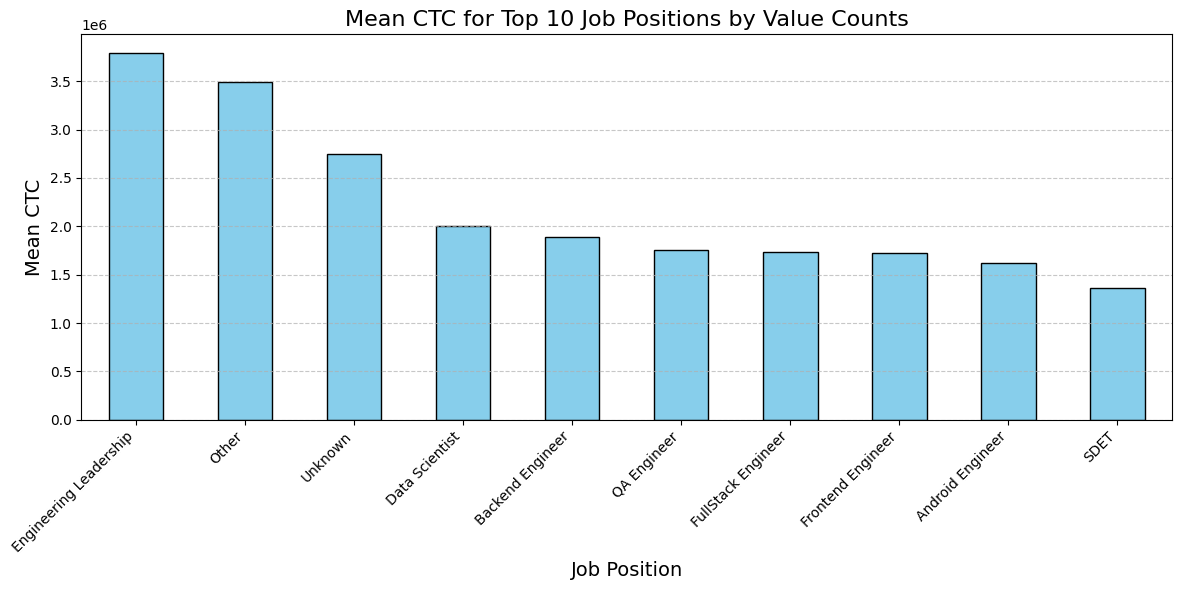

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get the top 10 job positions by value counts
top_10_positions = df['job_position'].value_counts().head(10).index

# Step 2: Filter the dataframe to include only the top 10 job positions
filtered_df = df[df['job_position'].isin(top_10_positions)]

# Step 3: Calculate the mean CTC for each of the top 10 job positions
mean_ctc_top_10 = filtered_df.groupby('job_position')['ctc'].mean()

# Step 4: Sort by mean CTC for better visualization
mean_ctc_top_10 = mean_ctc_top_10.sort_values(ascending=False)

# Step 5: Plot the bar chart
plt.figure(figsize=(12, 6))
mean_ctc_top_10.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Mean CTC for Top 10 Job Positions by Value Counts', fontsize=16)
plt.xlabel('Job Position', fontsize=14)
plt.ylabel('Mean CTC', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


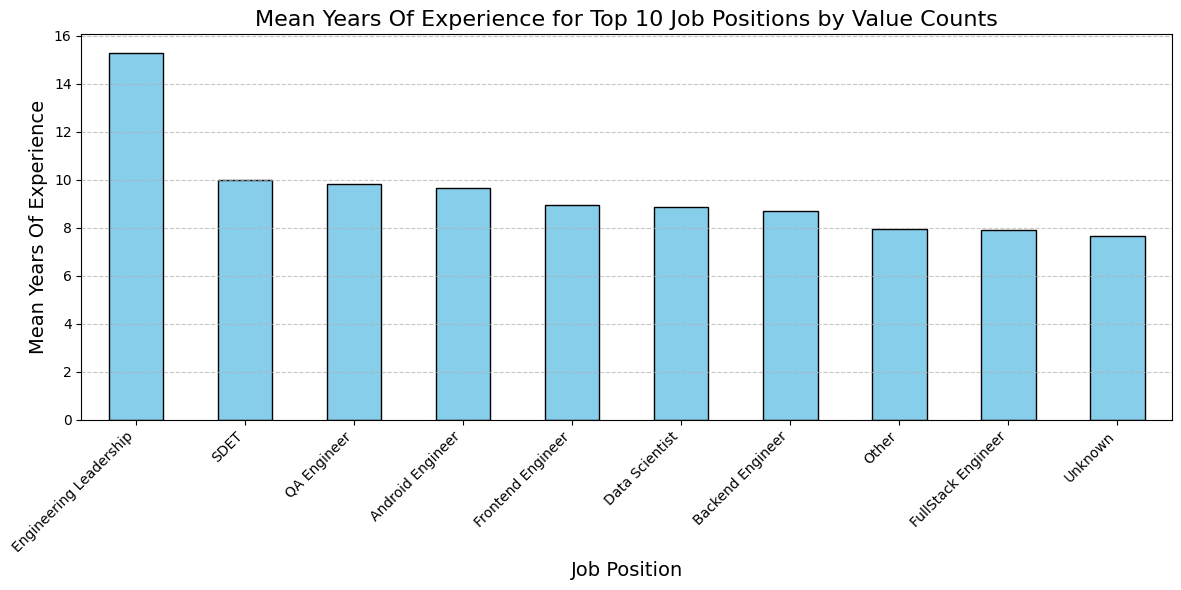

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get the top 10 job positions by value counts
top_10_positions = df['job_position'].value_counts().head(10).index

# Step 2: Filter the dataframe to include only the top 10 job positions
filtered_df = df[df['job_position'].isin(top_10_positions)]

# Step 3: Calculate the mean CTC for each of the top 10 job positions
mean_ctc_top_10 = filtered_df.groupby('job_position')['years_of_experience'].mean()

# Step 4: Sort by mean CTC for better visualization
mean_ctc_top_10 = mean_ctc_top_10.sort_values(ascending=False)

# Step 5: Plot the bar chart
plt.figure(figsize=(12, 6))
mean_ctc_top_10.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Mean Years Of Experience for Top 10 Job Positions by Value Counts', fontsize=16)
plt.xlabel('Job Position', fontsize=14)
plt.ylabel('Mean Years Of Experience', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
# 1. Top 10 employees earning more than most employees in the company (Tier 1)
tier_1_employees = (
    df_merged[df_merged["tier"] == 3]
    .sort_values(by="ctc", ascending=False)
    .head(10)
)

In [ ]:
# Printing Results
print("\n1. Top 10 employees earning more than most employees in the company (Tier 1):")
print(tier_1_employees)


1. Top 10 employees earning more than most employees in the company (Tier 1):
        orgyear        ctc        job_position  ctc_updated_year  \
73217      2018  255555555             Unknown              2016   
10443      2020  200000000             Unknown              2019   
75297      2014  200000000    Support Engineer              2020   
196344     2020  200000000             Unknown              2020   
99294      2018  200000000  FullStack Engineer              2019   
169757     2019  200000000             Unknown              2019   
196258     2017  200000000             Unknown              2020   
170356     2018  200000000             Unknown              2020   
170404     2012  200000000        Data Analyst              2020   
74490      2014  200000000             Unknown              2020   

        instance_flag  unemployed  years_of_experience  \
73217               0           0                    6   
10443               0           0                    4  

In [ ]:
# 2. Top 10 employees of data science in each company earning more than peers (Class 1)
# Assuming 'Data Science' is part of job_position
top_ds_employees = (
    df_merged[df_merged["job_position"].str.contains("Data Science", na=False) & (df_merged["class"] == 3)]
    .sort_values(by=["company_hash_encoded", "ctc"], ascending=[True, False])
    .groupby("company_hash_encoded")
    .head(10)
)

In [ ]:
print("\n2. Top 10 employees of data science in each company earning more than their peers (Class 1):")
print(top_ds_employees)


2. Top 10 employees of data science in each company earning more than their peers (Class 1):
Empty DataFrame
Columns: [orgyear, ctc, job_position, ctc_updated_year, instance_flag, unemployed, years_of_experience, years_since_ctc_upgrade, CTC_change, job_position_freq, PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA_6, PCA_7, PCA_8, company_hash_encoded, email_hash_encoded, ctc_mean, ctc_median, ctc_max, ctc_min, ctc_count, designation, class, tier]
Index: []

[0 rows x 29 columns]


In [ ]:
# 3. Bottom 10 employees of data science in each company earning less than peers (Class 3)
bottom_ds_employees = (
    df_merged[df_merged["job_position"].str.contains("Data Science", na=False) & (df_merged["class"] == 1)]
    .sort_values(by=["company_hash_encoded", "ctc"])
    .groupby("company_hash_encoded")
    .head(10)
)

In [ ]:
print("\n3. Bottom 10 employees of data science in each company earning less than their peers (Class 3):")
print(bottom_ds_employees)



3. Bottom 10 employees of data science in each company earning less than their peers (Class 3):
Empty DataFrame
Columns: [orgyear, ctc, job_position, ctc_updated_year, instance_flag, unemployed, years_of_experience, years_since_ctc_upgrade, CTC_change, job_position_freq, PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA_6, PCA_7, PCA_8, company_hash_encoded, email_hash_encoded, ctc_mean, ctc_median, ctc_max, ctc_min, ctc_count, designation, class, tier]
Index: []

[0 rows x 29 columns]


In [ ]:
# 4. Bottom 10 employees earning less than most employees in the company (Tier 3)
tier_3_employees = (
    df_merged[df_merged["tier"] == 1]
    .sort_values(by="ctc")
    .head(10)
)


In [ ]:
print("\n4. Bottom 10 employees earning less than most employees in the company (Tier 3):")
print(tier_3_employees)


4. Bottom 10 employees earning less than most employees in the company (Tier 3):
        orgyear   ctc            job_position  ctc_updated_year  \
42734      2014     2        Backend Engineer              2019   
195056     2013     6                 Unknown              2018   
28814      2013    14                 Unknown              2018   
148378     2016    15                 Unknown              2018   
199269     2022   200      FullStack Engineer              2021   
149141     2018   600      FullStack Engineer              2021   
124319     2023   600                 Unknown              2019   
103135     2012   600        Backend Engineer              2017   
62884      2010  1000  Engineering Leadership              2020   
199668     2018  1000                   Other              2020   

        instance_flag  unemployed  years_of_experience  \
42734               0           0                   10   
195056              0           0                   11   
28814 

In [ ]:
# 5. Top 10 employees in each company - X department - with specific years of experience earning more than peers
# Replace 'X department' with the desired department name (e.g., 'Data Science')
department_name = "Engineering Leadership"
specific_years = [12, 14, 16]

In [ ]:
top_employees_specific_experience = (
    df_merged[
        (df_merged["job_position"].str.contains(department_name, na=False))
        & (df_merged["years_of_experience"].isin(specific_years))
        & (df_merged["tier"] == 3)
    ]
    .sort_values(by=["company_hash_encoded", "ctc"], ascending=[True, False])
    .groupby("company_hash_encoded")
    .head(10)
)



In [ ]:

print("\n5. Top 10 employees in each company - Engineering Leadership - with 12/14/16 years of experience earning more than peers:")
print(top_employees_specific_experience)


5. Top 10 employees in each company - Engineering Leadership - with 12/14/16 years of experience earning more than peers:
        orgyear      ctc            job_position  ctc_updated_year  \
140385     2010  4000000  Engineering Leadership              2019   
156486     2012  2000000  Engineering Leadership              2021   
27663      2008  3000000  Engineering Leadership              2019   
315        2010  1400000  Engineering Leadership              2021   
124043     2012  5000000  Engineering Leadership              2019   
...         ...      ...                     ...               ...   
68385      2008  5800000  Engineering Leadership              2017   
132366     2012  2500000  Engineering Leadership              2021   
22782      2008  2039999  Engineering Leadership              2019   
18502      2012  2500000  Engineering Leadership              2019   
99594      2012  3000000  Engineering Leadership              2019   

        instance_flag  unemployed  y

In [ ]:
top_companies = (
    df_merged.groupby("company_hash_encoded")["ctc"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="average_ctc")
)

In [ ]:
print("\n6. Top 10 companies based on their CTC:")
print(top_companies)


6. Top 10 companies based on their CTC:
   company_hash_encoded   average_ctc
0                 30473  1.000150e+09
1                  1216  2.500000e+08
2                 17267  2.000000e+08
3                 31102  2.000000e+08
4                 19982  2.000000e+08
5                 33390  2.000000e+08
6                   583  2.000000e+08
7                 36680  2.000000e+08
8                 21513  2.000000e+08
9                 15015  2.000000e+08


In [ ]:


# 7. Top 2 positions in every company based on average CTC
top_positions_per_company = (
    df_merged.groupby(["company_hash_encoded", "job_position"])["ctc"]
    .mean()
    .sort_values(ascending=False)
    .groupby("company_hash_encoded")
    .head(2)
    .reset_index(name="average_ctc")
)

In [ ]:


print("\n7. Top 2 positions in every company based on CTC:")
print(top_positions_per_company)


7. Top 2 positions in every company based on CTC:
       company_hash_encoded            job_position   average_ctc
0                     30473                 Unknown  1.000150e+09
1                     14515                 Unknown  2.555556e+08
2                      1216                 Unknown  2.500000e+08
3                     36632                   Other  2.000000e+08
4                     29428                 Unknown  2.000000e+08
...                     ...                     ...           ...
46407                 24779               Cofounder  5.000000e+02
46408                 26681  Database Administrator  3.000000e+02
46409                  6676        Android Engineer  2.500000e+01
46410                 25053                   Other  2.400000e+01
46411                 32776                 Unknown  1.550000e+01

[46412 rows x 3 columns]


In [ ]:
scaled_df.head()

,ctc,years_of_experience,years_since_ctc_upgrade,CTC_change,instance_flag,unemployed,job_position_freq
0,0.080160,0.668082,0.344769,-0.035437,0.0,0.0,1.516249
1,-0.173053,0.437088,-0.397595,-0.035437,0.0,0.0,1.516249
2,-0.091246,-1.410863,0.344769,-0.035437,0.0,0.0,0.366128
3,-0.036708,2.516033,-1.139958,-0.035437,0.0,0.0,0.366128
4,0.072369,1.361063,1.087132,-0.035437,0.0,0.0,-0.196761


K-MEANS CLUSTERING USING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, cdist

In [ ]:
scaled_df1.head()

,ctc,years_of_experience,years_since_ctc_upgrade,CTC_change,instance_flag,unemployed,job_position_freq
0,0.003499,0.222222,0.333333,0.0,0.0,0.0,1.000000
1,0.000250,0.203704,0.166667,0.0,0.0,0.0,1.000000
2,0.001300,0.055556,0.333333,0.0,0.0,0.0,0.596607
3,0.002000,0.370370,0.000000,0.0,0.0,0.0,0.596607
4,0.003399,0.277778,0.500000,0.0,0.0,0.0,0.399180


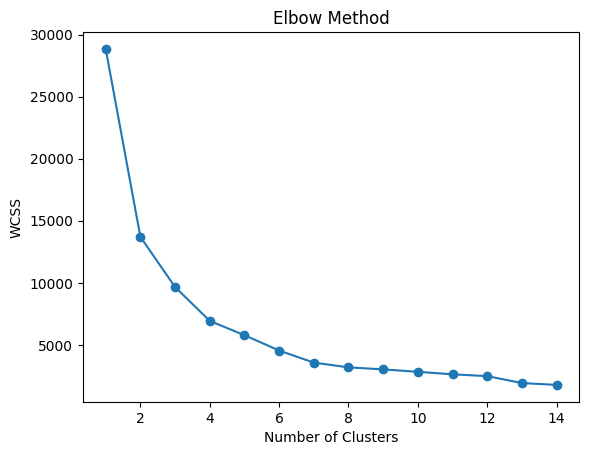

In [ ]:
# Calculate WCSS for different k values
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df1)
    wcss.append(kmeans.inertia_)  # WCSS value

# Plot the Elbow Method
plt.plot(range(1, 15), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
# Based on elbow method, assume the optimal number of clusters is 4
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_df1)
company_aggregates['Cluster'] = clusters

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_df1, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7708136950307688


In [ ]:
company_aggregates.head(5)

,email_hash,company_hash,ctc,years_of_experience,years_since_ctc_upgrade,CTC_change,instance_flag,unemployed,job_position_freq,Cluster
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,3500000.0,12.0,5.0,0.0,0,0,0.257323,2
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,250000.0,11.0,4.0,0.0,0,0,0.257323,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,1300000.0,3.0,5.0,0.0,1,0,0.153523,1
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2000000.0,20.0,3.0,0.0,0,0,0.153523,1
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,3400000.0,15.0,6.0,0.0,0,0,0.102721,0


In [ ]:
# Based on elbow method, assume the optimal number of clusters is 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_df1)
company_aggregates['Cluster1'] = clusters

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg_4 = silhouette_score(scaled_df1, kmeans.labels_)
print("Silhouette Score:", silhouette_avg_4)

Silhouette Score: 0.8480595200452173


In [ ]:
company_aggregates.head(5)

,email_hash,company_hash,ctc,years_of_experience,years_since_ctc_upgrade,CTC_change,instance_flag,unemployed,job_position_freq,Cluster,Cluster1
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,3500000.0,12.0,5.0,0.0,0,0,0.257323,2,2
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,250000.0,11.0,4.0,0.0,0,0,0.257323,2,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,1300000.0,3.0,5.0,0.0,1,0,0.153523,1,1
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2000000.0,20.0,3.0,0.0,0,0,0.153523,1,1
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,3400000.0,15.0,6.0,0.0,0,0,0.102721,0,0


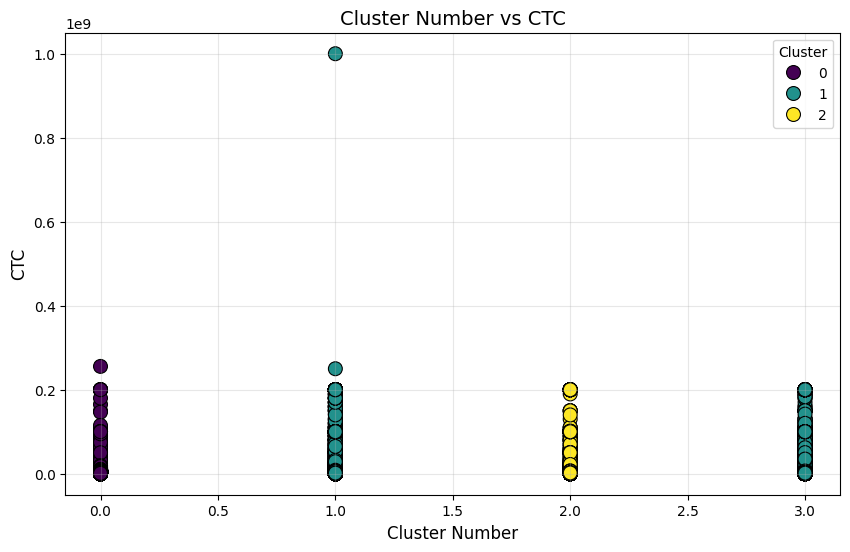

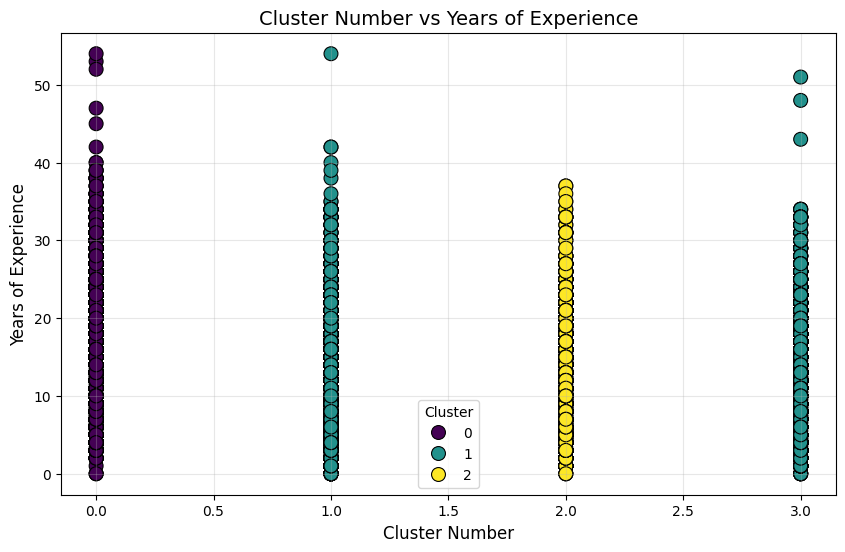

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Cluster vs CTC
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=company_aggregates,
    x='Cluster1',
    y='ctc',
    hue='Cluster',  # Add color based on clusters
    palette='viridis',  # Choose a color palette
    s=100,  # Marker size
    edgecolor='k'  # Black edge for markers
)
plt.title('Cluster Number vs CTC', fontsize=14)
plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('CTC', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot for Cluster vs Years of Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=company_aggregates,
    x='Cluster1',
    y='years_of_experience',
    hue='Cluster',  # Add color based on clusters
    palette='viridis',  # Choose a color palette
    s=100,  # Marker size
    edgecolor='k'  # Black edge for markers
)
plt.title('Cluster Number vs Years of Experience', fontsize=14)
plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Years of Experience', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler

# features = company_aggregates.drop(columns=['email_hash', 'company_hash', 'Cluster','Cluster1'])  # Drop irrelevant columns
# clusters = company_aggregates['Cluster1']  # Extract cluster labels

# # Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# # Apply t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
# tsne_results = tsne.fit_transform(scaled_features)

# # Create a DataFrame for visualization
# tsne_df = pd.DataFrame({
#     'TSNE1': tsne_results[:, 0],
#     'TSNE2': tsne_results[:, 1],
#     'Cluster': clusters
# })

# # Plot the clusters using seaborn
# plt.figure(figsize=(10, 8))
# sns.scatterplot(
#     x='TSNE1', y='TSNE2',
#     hue='Cluster',
#     palette='viridis',  # Change the palette if needed
#     data=tsne_df,
#     legend='full',
#     alpha=0.8
# )
# plt.title("t-SNE Visualization of Clusters")
# plt.xlabel("TSNE1")
# plt.ylabel("TSNE2")
# plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()



KeyboardInterrupt: 

Conclusion from KMEANS Clustering:

Silhoutte score of 0.84 indicates well separated clusters

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


DBSCAN FOR A SUBSAMPLE

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data_sample)
scaled_df_sample['DBSCAN_Cluster'] = dbscan_labels


In [ ]:
scaled_df1.shape

(160231, 9)

In [ ]:
company_aggregates.shape

(160231, 9)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg_dbscan = silhouette_score(scaled_df_sample, dbscan_labels)
print("Silhouette Score:", silhouette_avg_dbscan)

Silhouette Score: 0.6441643622452761


In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# tsne = TSNE(n_components=2, random_state=42)
# tsne_result = tsne.fit_transform(scaled_data_sample)

# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan_labels, cmap='viridis')
# plt.colorbar()
# plt.show()


# **Hierarchical Clustering**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

In [ ]:
linkage_matrix = linkage(scaled_data_sample, method='ward')  # Ward minimizes variance within clusters


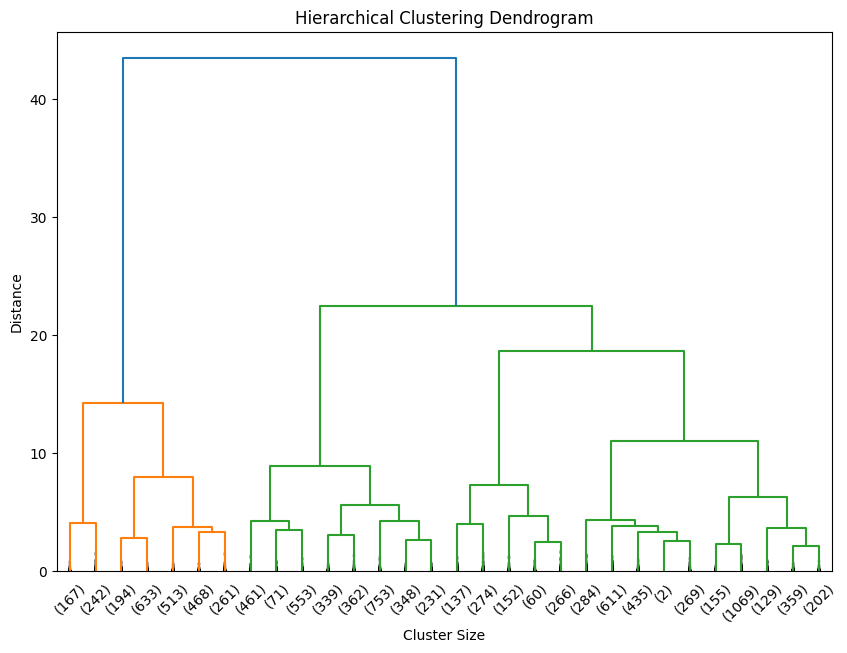

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [ ]:
# Create clusters using a distance threshold
# threshold = 45  # Adjust this based on the dendrogram
# clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# # OR create clusters by specifying the number of clusters
num_clusters = 2
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add cluster labels to the original dataset
scaled_df_sample['cluster'] = clusters


# **HIERARCHICAL CLUSTERING EVALUATION - SILHOUTTE SCORE**

In [ ]:
# Silhouette Score (higher is better, range: -1 to 1)
if len(set(clusters)) > 1:  # Ensure at least two clusters
    silhouette = silhouette_score(scaled_df_sample, clusters)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score cannot be calculated with a single cluster.")

# Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(scaled_df_sample, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.7088343886162007
Davies-Bouldin Index: 0.40858791919941023


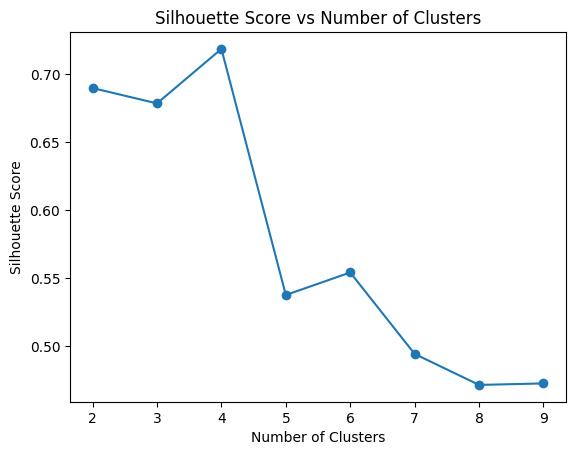

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

sil_scores = []
for n_clusters in range(2, 10):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = model.fit_predict(scaled_df_sample)
    score = silhouette_score(scaled_df_sample, cluster_labels)
    sil_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 10), sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()
